In [1]:
import pandas as pd
df = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data.csv")
df

C:\Users\obaya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020/05/27,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020/06/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020/06/28,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/07/06,NaN,NaN,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...
2668170,2020/03/18,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Unknown,Unknown,Yes
2668171,2020/05/20,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Missing,Missing,No,Missing
2668172,2020/04/02,2020/03/18,2020/03/15,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Missing,No,Missing
2668173,2020/03/25,2020/03/18,NaN,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Unknown,Unknown,Yes


In [2]:
df.fillna(0,inplace=True)
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020/05/27,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020/06/06,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020/06/28,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/07/06,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...
2668170,2020/03/18,2020/03/18,0,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Unknown,Unknown,Yes
2668171,2020/05/20,2020/03/18,0,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Missing,Missing,No,Missing
2668172,2020/04/02,2020/03/18,2020/03/15,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,No,Missing,No,Missing
2668173,2020/03/25,2020/03/18,0,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Unknown,Unknown,Unknown,Yes


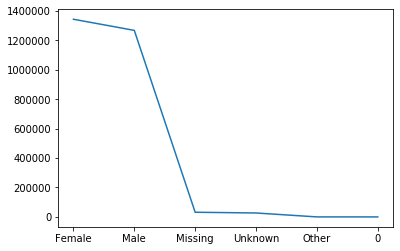

In [3]:
df["sex"].value_counts().plot()

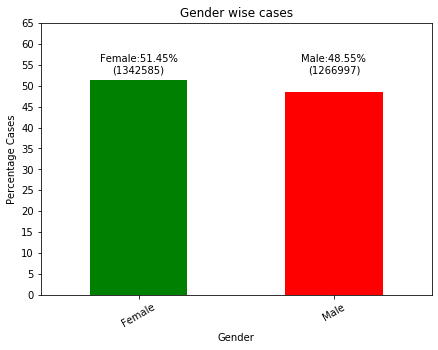

In [4]:
from matplotlib import pyplot as plt
# removed the unwanted data of Missing, Unknown and Other
df2 = df[(df["sex"] == "Male") | (df["sex"] == "Female")] 
#show the Percentage value.
df3 =(df2['sex'].value_counts()/df2['sex'].count())*100  
#plot the Graph
ax = df3.plot.bar(color=['green', 'red'],title="Gender wise cases", figsize=(7,5), zorder=2, width=0.5)
# add the labels
plt.xlabel("Gender")
plt.ylabel("Percentage Cases")
plt.xticks(rotation=30, horizontalalignment="center")
ax.set_yticks(range(0,70,5)) 
df4=df2["sex"].value_counts()
#Add the text on top of bar chart
j=0
for i in df3.index: 
    str1 = i + ":" + str(df3[i].round(2)) + "%\n(" + str(df4[i]) + ")"
    ax.text(j,55,str1, ha='center', va='center')
    j +=1

In [5]:
df["age_group"].value_counts()

20 - 29 Years    468471
30 - 39 Years    450637
40 - 49 Years    428478
50 - 59 Years    427865
60 - 69 Years    307648
80+ Years        177459
70 - 79 Years    175515
10 - 19 Years    161352
0 - 9 Years       67700
Unknown            2969
0                    81
Name: age_group, dtype: int64

In [6]:
age_group_df1 = df["age_group"].value_counts()

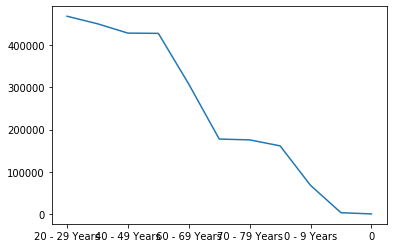

In [7]:
age_group_df1.plot()

In [8]:
age_group_df = df[(df["age_group"] != 0) &  (df["age_group"] != "Unknown")] 

In [9]:
age_group_df1 = age_group_df["age_group"].value_counts(sort=False)

In [10]:
age_group_df1

20 - 29 Years    468471
70 - 79 Years    175515
30 - 39 Years    450637
80+ Years        177459
50 - 59 Years    427865
60 - 69 Years    307648
40 - 49 Years    428478
10 - 19 Years    161352
0 - 9 Years       67700
Name: age_group, dtype: int64

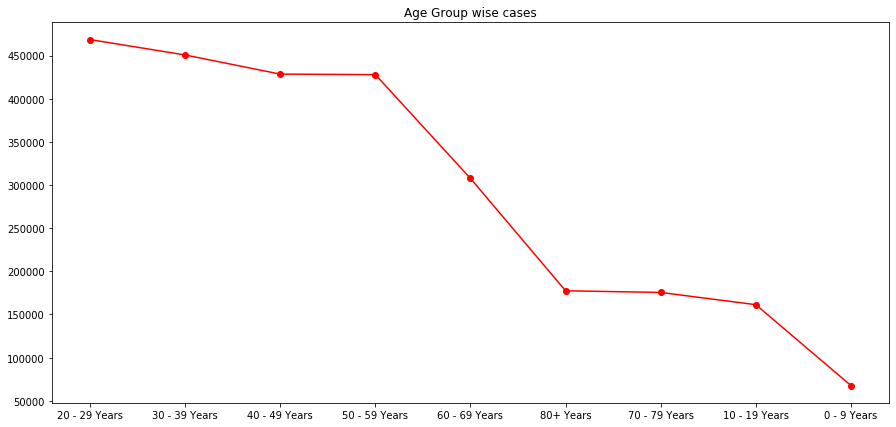

In [11]:
age_group_df = df[(df["age_group"] != 0) &  (df["age_group"] != "Unknown")] 
age_group_df1 = age_group_df["age_group"].value_counts()
ax = age_group_df1.plot(color=['red'],title="Age Group wise cases", figsize=(15,7),marker='o')

In [12]:
age_group_df["age_group"].unique()

array(['0 - 9 Years', '10 - 19 Years', '20 - 29 Years', '30 - 39 Years',
       '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years',
       '80+ Years'], dtype=object)

In [13]:
for age_group in age_group_df["age_group"].unique():
    print (age_group_df1[age_group])

67700
161352
468471
450637
428478
427865
307648
175515
177459


In [14]:
age_group_df1.sort_index()

0 - 9 Years       67700
10 - 19 Years    161352
20 - 29 Years    468471
30 - 39 Years    450637
40 - 49 Years    428478
50 - 59 Years    427865
60 - 69 Years    307648
70 - 79 Years    175515
80+ Years        177459
Name: age_group, dtype: int64

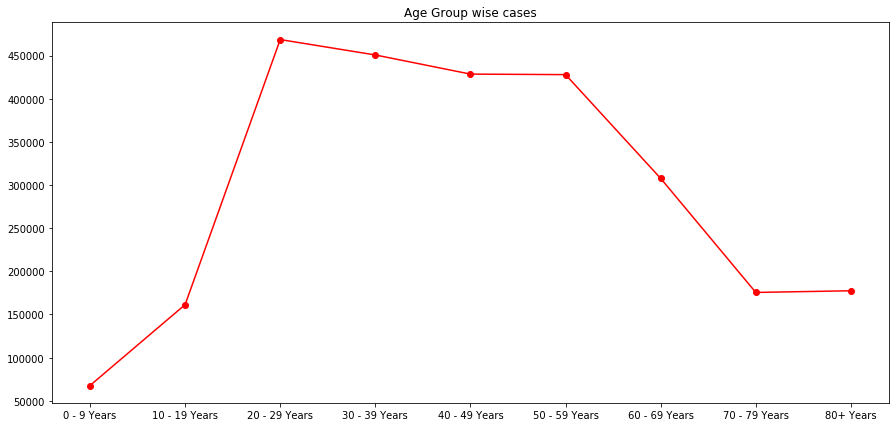

In [15]:
age_group_df1 = age_group_df["age_group"].value_counts()
age_group_df1.sort_index(inplace=True)
ax = age_group_df1.plot(color=['red'],title="Age Group wise cases", figsize=(15,7),marker='o')

In [16]:
df["Race and ethnicity (combined)"].value_counts()

Unknown                                                 1254212
White, Non-Hispanic                                      534756
Hispanic/Latino                                          445045
Black, Non-Hispanic                                      292357
Multiple/Other, Non-Hispanic                              62323
Asian, Non-Hispanic                                       54412
American Indian/Alaska Native, Non-Hispanic               19434
Native Hawaiian/Other Pacific Islander, Non-Hispanic       5629
0                                                             7
Name: Race and ethnicity (combined), dtype: int64

In [17]:
race_ethnicity_df1 = df[(df["Race and ethnicity (combined)"] != "Unknown") & (df["Race and ethnicity (combined)"] != 0)]

In [18]:
race_ethnicity_df1

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/07/03,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
1,2020/05/27,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",No,Missing,No,Missing
2,2020/06/06,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
3,2020/06/28,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
4,2020/07/06,0,0,Laboratory-confirmed case,Female,0 - 9 Years,"American Indian/Alaska Native, Non-Hispanic",Missing,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...
2667886,2020/06/05,2020/03/18,2020/03/12,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,Unknown,No,Yes
2667887,2020/03/24,2020/03/18,0,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",Unknown,Unknown,Unknown,Yes
2667888,2020/03/18,2020/03/18,0,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",Unknown,Unknown,Unknown,Unknown
2667889,2020/03/18,2020/03/18,0,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",No,No,Unknown,Yes


In [19]:
race_ethnicity_df1["Race and ethnicity (combined)"].value_counts()

White, Non-Hispanic                                     534756
Hispanic/Latino                                         445045
Black, Non-Hispanic                                     292357
Multiple/Other, Non-Hispanic                             62323
Asian, Non-Hispanic                                      54412
American Indian/Alaska Native, Non-Hispanic              19434
Native Hawaiian/Other Pacific Islander, Non-Hispanic      5629
Name: Race and ethnicity (combined), dtype: int64

In [20]:
race_ethnicity_df2 = race_ethnicity_df1["Race and ethnicity (combined)"].value_counts()

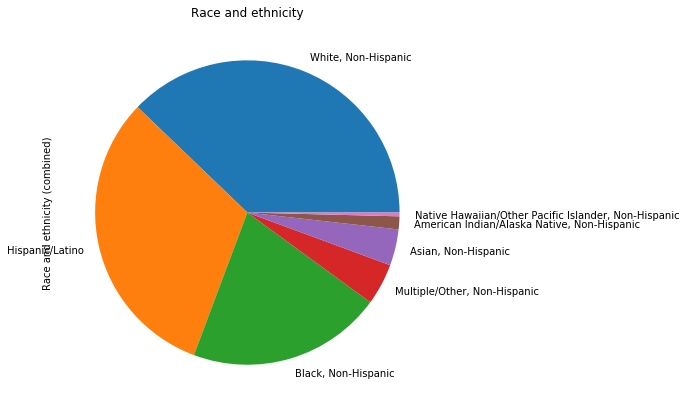

In [21]:
race_ethnicity_df2.plot.pie(title="Race and ethnicity",figsize=(15,7))